## Team Members:
    ### Sri Lalana
    ### Parsis Presswala
    ### Trapti Khandelwal

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## Checking the assumptions of linear regression

#### Linearity:The linearity assumption can best be tested with scatter plots.

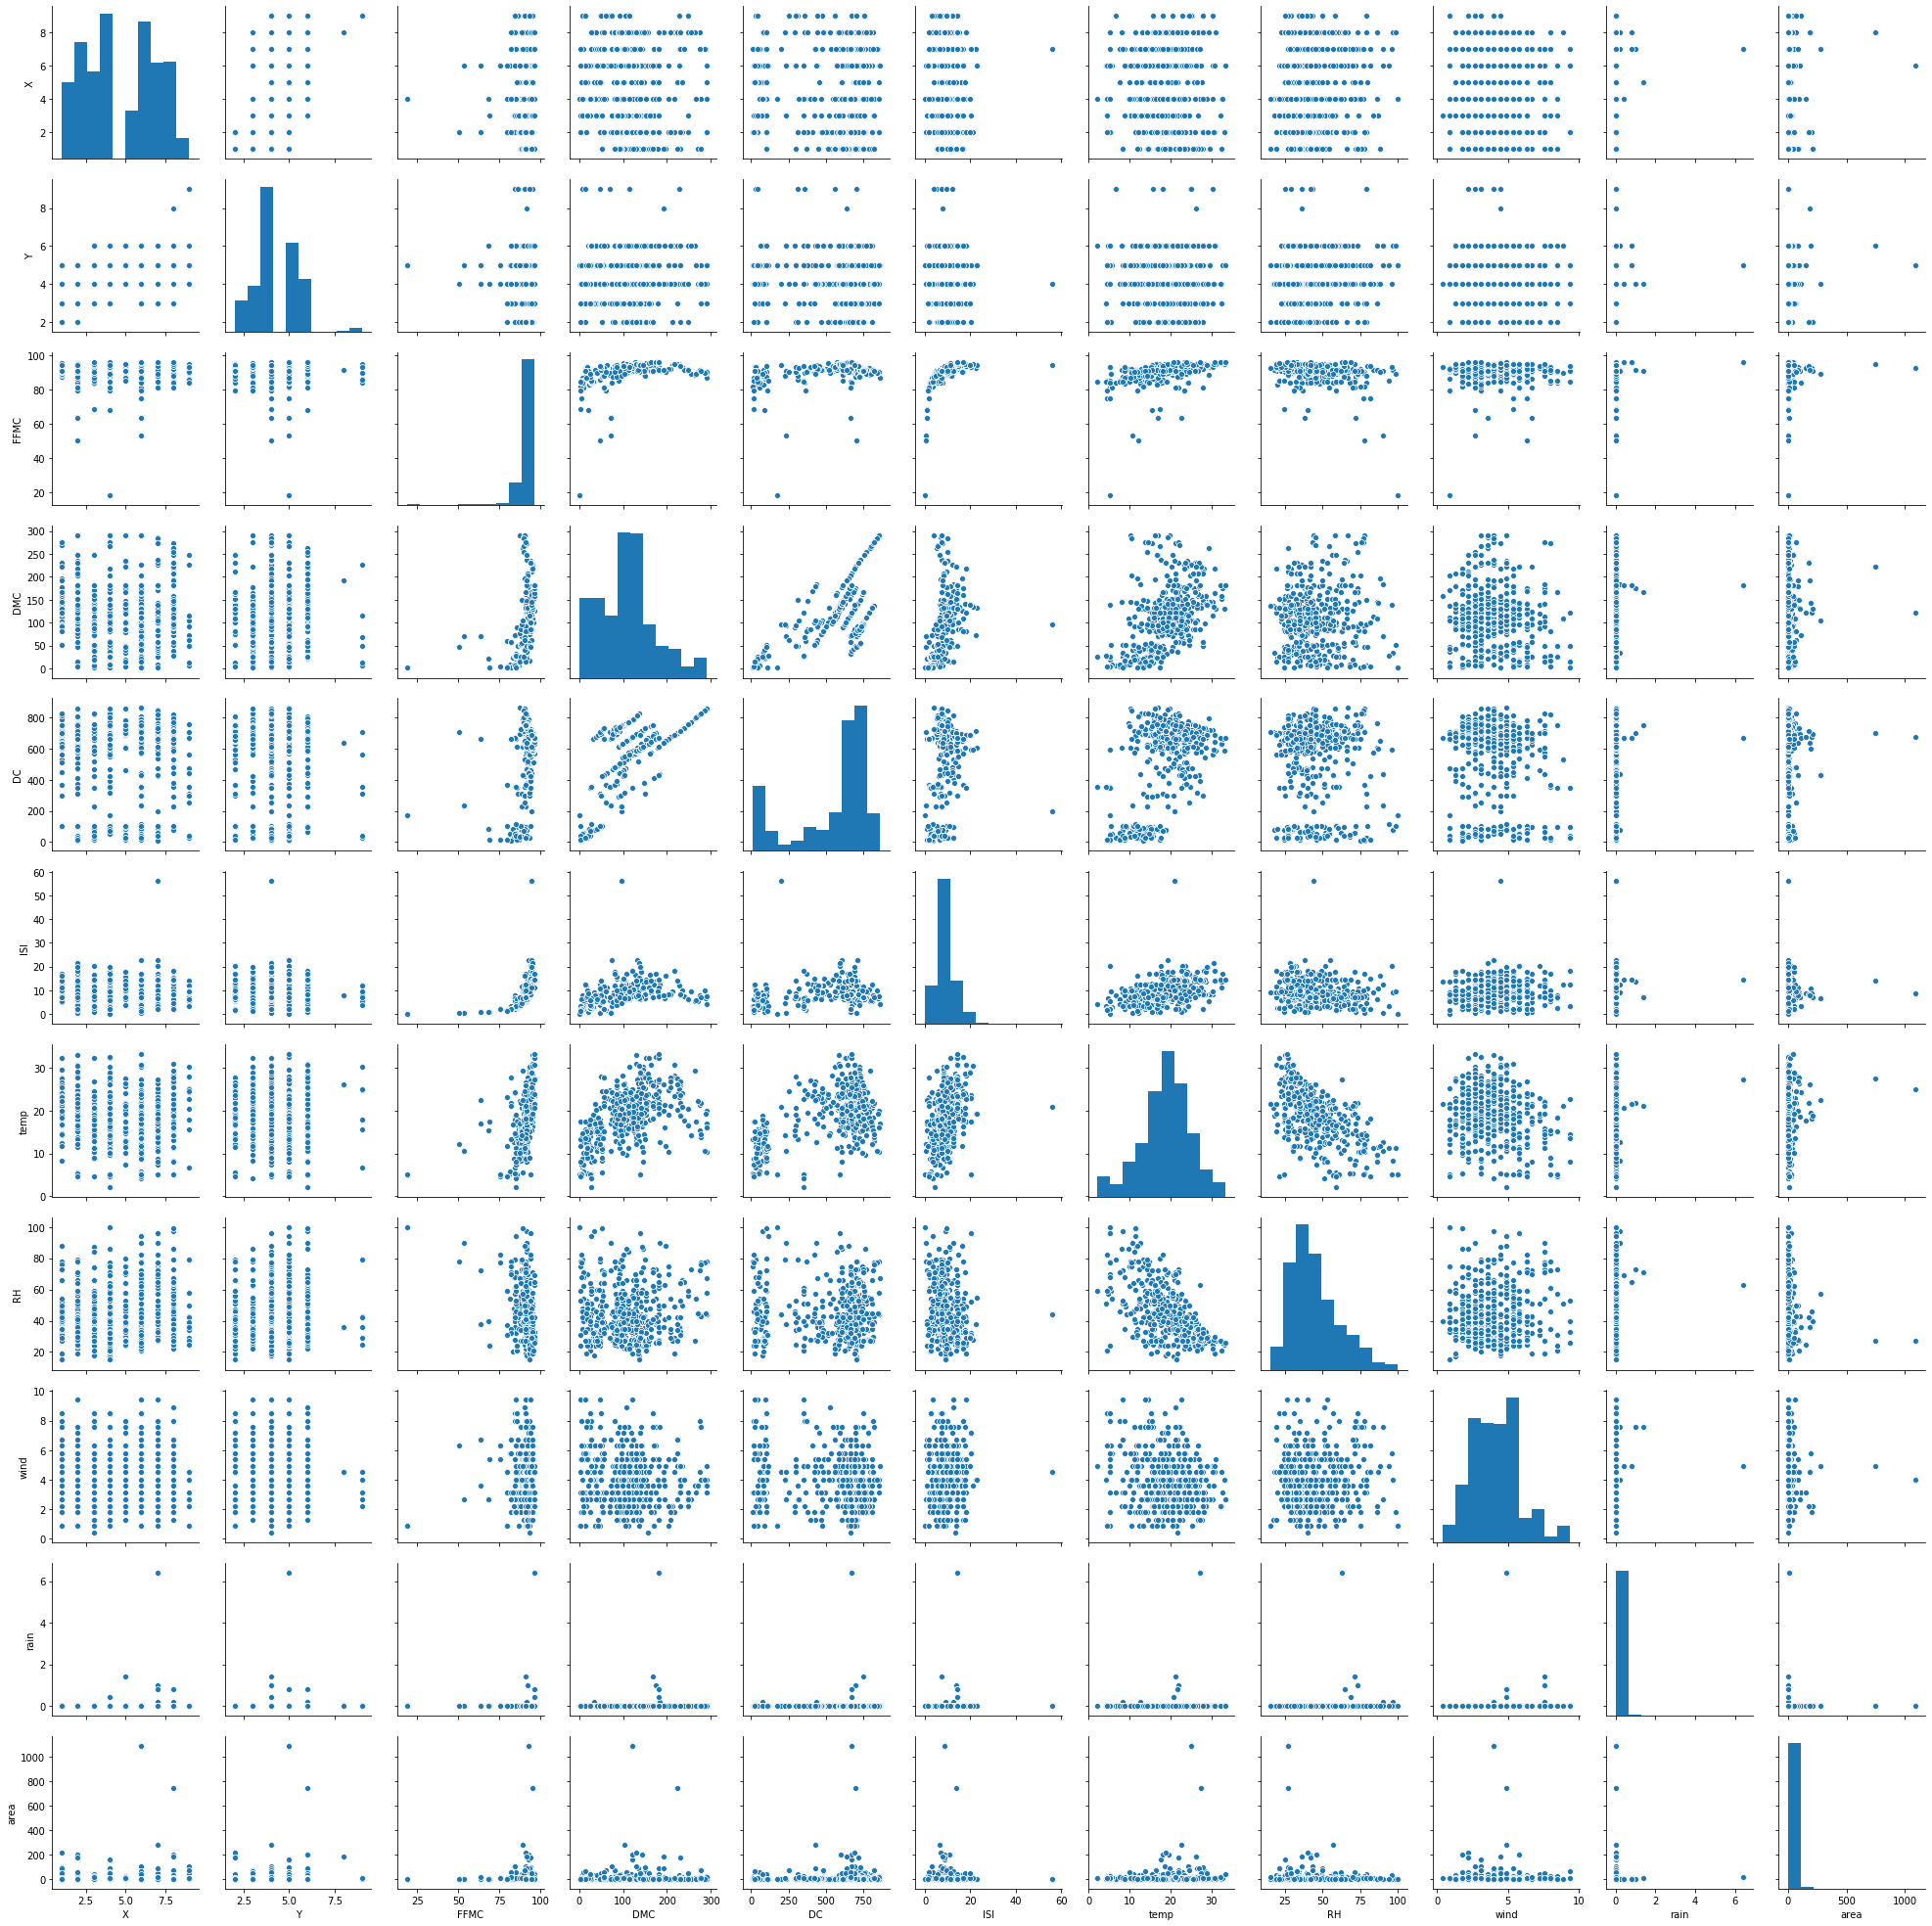

In [3]:

import seaborn as sns
sns.pairplot(df)

Explanation : From the above Scatter plot we can see that the data has no linearity .
So the first assumption of the linearity is failed.

#### Normality:This assumption can best be checked with a histogram or a Q-Q-Plot. 

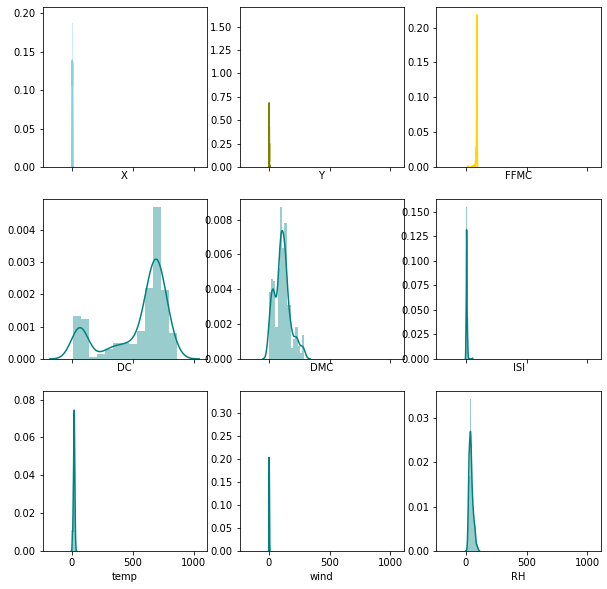

In [4]:
f, axes = plt.subplots(3, 3, figsize=(10, 10), sharex=True)
sns.distplot( df["X"] , color="skyblue", ax=axes[0, 0])
sns.distplot( df["Y"] , color="olive", ax=axes[0, 1])
sns.distplot( df["FFMC"] , color="gold", ax=axes[0, 2])
sns.distplot( df["DC"] , color="teal", ax=axes[1, 0])
sns.distplot( df["DMC"] , color="teal", ax=axes[1, 1])
sns.distplot( df["ISI"] , color="teal", ax=axes[1,2])
sns.distplot( df["temp"] , color="teal", ax=axes[2,0])
sns.distplot( df["wind"] , color="teal", ax=axes[2,1])
#sns.distplot( df["rain"] , color="teal", ax=axes[2,2])
sns.distplot( df["RH"] , color="teal", ax=axes[2,2])

Explanation : We can see in the above histograms that almost all are in  the shape of leptokurtic and few distributions have multimodal.
Inorder to satisfy the normality condition ,shape of the distribution should be symmetric and peakedness should be mesokurtic.Clearly none of the above distributions are satisfying these conditions.So the data failed in normality assumption.

#### Multicollinearity: It can be tested through VIF,Correlation matrix

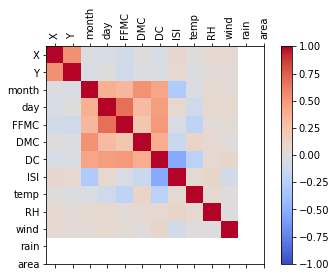

In [5]:
### Visualising the Correlation through Heat Map
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [6]:
df.corr() ## Correlation matrix

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


With VIF > 5 there is an indication that multicollinearity may be present; with VIF > 10 there is certainly multicollinearity among the variables.We can see that there few varibles that are greater than 10, centering the data the simplest way to address the problem is to remove independent variables with high VIF values.

#### homoscedasticity:  we can check this assuption with Residual Plot which is given below

#### Cleaning the data:

In [7]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

#### Since we donot have null values ,we are adding 10% of the null values to the data

In [8]:

df = df.mask(np.random.random(df.shape) < .1)
df.head(5)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7.0,NaN,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0
1,7.0,4.0,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7.0,4.0,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0
3,8.0,6.0,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,8.0,6.0,mar,sun,89.3,51.3,NaN,9.6,11.4,99.0,1.8,0.0,0.0


In [9]:
df.isnull().sum()

X        40
Y        42
month    51
day      57
FFMC     47
DMC      50
DC       53
ISI      56
temp     54
RH       64
wind     48
rain     38
area     59
dtype: int64

In [10]:
## checking the column labels
for col in df.columns:
    print(col,':',len(df[col].unique()),'labels')

X : 10 labels
Y : 7 labels
month : 13 labels
day : 8 labels
FFMC : 104 labels
DMC : 209 labels
DC : 207 labels
ISI : 115 labels
temp : 181 labels
RH : 75 labels
wind : 22 labels
rain : 6 labels
area : 228 labels


In [11]:
## filling of the missing values
df['X'].fillna(df['X'].mean(),inplace=True)
df['Y'].fillna(df['Y'].mean(),inplace=True)
df['FFMC'].fillna(df['FFMC'].mean(),inplace=True)
df['DMC'].fillna(df['DMC'].mean(),inplace=True)
df['DC'].fillna(df['DC'].mean(),inplace=True)
df['ISI'].fillna(df['ISI'].mean(),inplace=True)
df['temp'].fillna(df['temp'].mean(),inplace=True)
df['RH'].fillna(df['RH'].mean(),inplace=True)
df['wind'].fillna(df['wind'].mean(),inplace=True)
df['rain'].fillna(df['rain'].mean(),inplace=True)
df['area'].fillna(df['area'].mean(),inplace=True)

In [12]:
df.fillna(method='ffill',inplace=True)

In [13]:
df.isnull().sum() #### Missing values are eliminated

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [14]:
#introducing the dummy variables in order to convert catogorical varuables to numeric
month=pd.get_dummies(df.month,drop_first=True)


df1=pd.concat([df,month],axis=1)


In [15]:
df2=df1.drop(['month','day'],axis=1)
df3=df2.drop(['X','Y'],axis=1)
df3.head(2)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0


In [16]:
X=df3.loc[:, df3.columns != 'area']
y=df3['area']

## Training and splitting of the data

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Even though linearity assumptions are not satisfied we just trying to check R score for this type of data using linear regression

In [18]:
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
# create a regressor object 
reg = LinearRegression()  
  
    
seed = 10

test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed) 
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt


predictions = reg.predict(X_test)
rmse = sqrt(mean_squared_error(y_test,predictions))
print("RMSE of test data",rmse)

RMSE of test data 87.3150278709322


In [20]:
pred_train=reg.predict(X_train)
rmse_train= sqrt(mean_squared_error(y_train,pred_train))
print("RMSE of test data",rmse_train)

RMSE of test data 47.27620511647828


In [21]:
from sklearn.metrics import mean_squared_error, r2_score
r2=reg.score(X_train,y_train)
print("The R Score for test data is:",r2)

The R Score for test data is: 0.036760024540147485


### Conclusion: As we can see that this type of data yield a veryless Rscore value i.e, almost close to zero. which clearly indicates that there is no linear relationship between the variables.

## Residual plot:

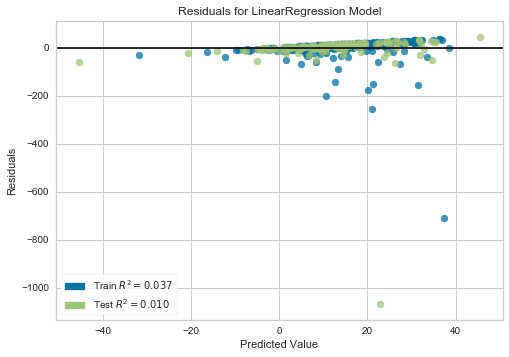

In [22]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(reg, hist=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

The above figure shows the presence of heteroskadasticity .

## Since our data is not satisfying the linearity assumptions so we can go with other regression methods like Ridge regression and lasso regression.

## Ridge

In [23]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
rr = Ridge(alpha=5)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print("RMSE of train data:",np.sqrt(mean_squared_error(y_train,pred_train_rr)))


pred_test_rr= rr.predict(X_test)
print("RMSE of test data:",np.sqrt(mean_squared_error(y_test,pred_test_rr))) 


RMSE of train data: 47.3163218402544
RMSE of test data: 87.13819665082845


In [24]:
print("R score of train data;",r2_score(y_train, pred_train_rr))

R score of train data; 0.035124596020331134


In [25]:
print("R Score of test data:",r2_score(y_test, pred_test_rr))

R Score of test data: 0.014007270500274949


## Lasso

In [26]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=5)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print('RMSE of train data:',np.sqrt(mean_squared_error(y_train,pred_train_lasso)))


pred_test_lasso= model_lasso.predict(X_test)
print('RMSE of test data:',np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 


RMSE of train data: 47.52113392544899
RMSE of test data: 87.39383859971166


In [27]:
print('R score of train data:',r2_score(y_train, pred_train_lasso))

R score of train data: 0.02675345313020039


In [28]:
print('R score of test data:',r2_score(y_test, pred_test_lasso))

R score of test data: 0.008213465827488609



 ## Conclusion: Even after applying the regularization techniques there no change in the R score of test data.

## There are mainly two types of regression algorithms - linear and nonlinear. When the linearity assumptions are  not satisfied then the non-linear regression algorithms come into picture that are able to capture the non-linearity within the data. Here we have presented some Tree based methods which comes non linear regression.

## Random Forest

In [29]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
X_train= sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [30]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [31]:
predictions = rf.predict(X_test)
pred_train=rf.predict(X_train)

In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test,predictions))
print("RMSE of test data",rmse)

RMSE of test data 87.73526113401071


In [33]:
rmse_train= sqrt(mean_squared_error(y_train,pred_train))
print("RMSE of test data",rmse_train)

RMSE of test data 19.806496060611288


In [34]:
r=rf.score(X_test, y_test)
print("R score of test data:",r)

R score of test data: 0.00044908061671278254


## Decision Trees:

In [35]:
## Standarizing the variables
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
X_train = sc_x.fit_transform(X_train)  
X_test = sc_x.transform(X_test) 

In [36]:
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor(max_depth=3,max_leaf_nodes=3)
reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=3, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [37]:
y_pred = reg.predict(X_test)
print("MSE of test data:",mean_squared_error(y_test, y_pred))
y_t = reg.predict(X_train)
print("MSE of train data:",mean_squared_error(y_train, y_t))

MSE of test data: 10135.507147342387
MSE of train data: 1770.5486533178976


In [38]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE of test data",rmse)

RMSE of test data 100.67525588416643


In [39]:
rs=reg.score(X_test, y_test)
print("R score of test data:",rs)

R score of test data: 0.00044908061671278254


## Bagging--KNN

In [40]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV

In [41]:
single_estimator = KNeighborsRegressor()
ensemble_estimator = BaggingRegressor(base_estimator = single_estimator) ### single_estimator--knn

In [42]:
param_dist = {'max_samples': [0.5,1.0],
              'max_features' : [0.6,1.0],
              'oob_score' : [True, False],
              'base_estimator__n_neighbors':[3,5,7],
              'n_estimators': [100]
              }

In [43]:
random_bag = RandomizedSearchCV(ensemble_estimator,
                                param_distributions = param_dist, 
                                cv=3, n_iter = 5, 
                                n_jobs=-1)

In [44]:
random_bag.fit(X_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                                                 leaf_size=30,
                                                                                 metric='minkowski',
                                                                                 metric_params=None,
                                                                                 n_jobs=None,
                                                                                 n_neighbors=5,
                                                                                 p=2,
                                                                                 weights='uniform'),
                                              bootstrap=True,
                                              bootstrap_features=False,
                                   

In [45]:
random_bag.best_params_    ### 0.5 means 50% samples

{'oob_score': True,
 'n_estimators': 100,
 'max_samples': 0.5,
 'max_features': 0.6,
 'base_estimator__n_neighbors': 7}

In [46]:
best_random_bag = random_bag.best_estimator_

In [47]:
y_pred = random_bag.predict(X_test)
y_pred_train=random_bag.predict(X_train)
from sklearn.metrics import r2_score, mean_squared_error

print ("RMSE of test data: ",np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE of test data:  88.20597729189615


In [48]:
print ("RMSE of train data: ",np.sqrt(mean_squared_error(y_train, y_pred_train)))
print ("R-score of train data",r2_score(y_train, y_pred_train))

RMSE of train data:  44.79670302602571
R-score of train data 0.13514881483717311


In [49]:
print ("R-score of test data",r2_score(y_test, y_pred))

R-score of test data -0.0103052486123969


## XGBoost

In [50]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [51]:
X=df3.loc[:, df3.columns != 'area']
y=df3['area']


In [52]:
##XGBoost regressor object by calling the XGBRegressor() class from the XGBoost library with the hyper-parameters passed as arguments.


xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [53]:
xg_reg.fit(X_train,y_train)

[17:37:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [54]:
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE of test data: %f" % (rmse))

RMSE of test data: 88.035686


In [55]:
pred_train=xg_reg.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
print("RMSE of train data: %f" % (rmse_train))

RMSE of train data: 38.820658


In [56]:
s=xg_reg.score(X_test,y_test)
print("R Score:",s)

R Score: -0.00640801038616412


## Gradiant Boosting:

In [57]:
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [58]:
X=df3.loc[:, df3.columns != 'area']
y=df3['area']


In [59]:
reg1= GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=1)
reg1.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1.0, loss='ls', max_depth=1,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [60]:
preds = reg1.predict(X_test)

In [61]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE of test data: %f" % (rmse))

RMSE of test data: 88.387870


In [62]:
pred_train=reg1.predict(X_train)

In [63]:
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
print("RMSE of train data: %f" % (rmse_train))

RMSE of train data: 33.035258


In [64]:
s1=reg1.score(X_train,y_train)
print("R score of train data:",s1)

R score of train data: 0.5296678239946464


In [65]:
s=reg.score(X_test,y_test)
print("R Score of test data :",s)

R Score of test data : -0.3161399173789532


## SVM 

In [66]:
#feature scaling 
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
X_train = sc_x.fit_transform(X_train)  
X_test = sc_x.transform(X_test) 

In [67]:
#importing svr from svm
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf',C=100) #here, we are setting the kernel to rbf which is a default kernel

In [68]:
#fitting the data
regressor.fit(X_train,y_train)
pred  = regressor.predict(X_test)
#checking the R score
from sklearn.metrics import r2_score
print("RScore of test data:",regressor.score(X_test,y_test))




RScore of test data: -0.019379297358645076


In [69]:
#Let's tune the  parameters to see if we can get better score
#here, we are changing the epsilon value to 1.0 
regressor = SVR(kernel = 'rbf',C=100,gamma=.001,epsilon=1.0)
regressor.fit(X_train,y_train)
pred = regressor.predict(X_test)
print("RScore of test data:",regressor.score(X_test,y_test))


RScore of test data: -0.02152031694438228


#### But the Rscore values is almost negative .So lets try with other kernels

In [70]:
##### SVR with polynomial kernel
regressor = SVR(kernel = 'poly',degree=.5,C=100,gamma='auto',epsilon=1.0,coef0=1)
regressor.fit(X_train,y_train)
pred = regressor.predict(X_test)
print("RScore of test data:",regressor.score(X_test,y_test))


RScore of test data: -0.02359933367999667


In [71]:
######## SVR with Linear Kernel
regressor = SVR(kernel = 'linear',C=100,gamma='auto',epsilon=1.0)
regressor.fit(X_train,y_train)
pred = regressor.predict(X_test)
print("RScore of test data:",regressor.score(X_test,y_test))


RScore of test data: -0.023622042642647223


In [72]:
####### SVR with gamma kernel
regressor = SVR(gamma = 'auto')
regressor.fit(X_train,y_train)
pred = regressor.predict(X_test)
print("RScore of test data:",regressor.score(X_test,y_test))


RScore of test data: -0.022357241627476654


In [73]:
####### SVR with sigmoid
regressor = SVR(kernel = 'sigmoid',C=10,epsilon=1.0)
regressor.fit(X_train,y_train)
pred = regressor.predict(X_test)
print("RScore of test data:",regressor.score(X_test,y_test))


RScore of test data: -0.026983833111714484


 # CONCLUSION : As we can see that both linear and non linear techinques are not giving apropriate results for the dataset ,which clearly indicates that the dataset taken is unable to find the patterns .So this can be considered as one of those situations where Machine learning algorithms cannot work.